<h1 style="text-align: center"> Timex & Verb Associations in Biblical Hebrew</h1>
<h3 style="text-align: center">Cody Kingham, MA Biblical Studies & Digital Humanities, VU Amsterdam</h3>
<div>
<img src="../images/ETCBC.png" height="400" width="400">
<img src="../images/VU_theology.png" height="400" width="400">
</div>

<hr>

## Hypothesis
Certain time expressions ("timexes") associate, positively and negatively, with certain verb forms in Biblical Hebrew. 

## Motivation
The association of time expressions with certain verbs have the potential to inform us about the semantic content of the elusive Hebrew verbal form.

## Methodology

Note that the terms timex (time expression) and time phrases will be used interchangably throughout this notebook.

This notebook proceeds in two steps: data analysis and inferential analysis.

#### 1. Descriptive Analysis
This entails describing the data in the HB for **A)** time phrases (i.e. a timex) and **B)** tenses in Biblical Hebrew. This is done through simple counts and visualizations that help get a sense of the data. What kinds of timexes are there in the HB? What kinds of groups can be observed amongst them? How are they distributed in terms of genre and clauses? Likewise, what are the occurrence statistics for all predicative verbs in the HB? How are they distributed? 

#### 2. Inferential Analysis
The second step entails comparing the timexes with the tenses found in their enclosing clause to see if there are any statistically significant associations. For this step, the statistical method of χ^2 can be used. The analysis will consider additional complicating factors such as discourse structure, and the potentially complex interactions between timexes and other semantic entities (including the verb forms). 

## Theory
Theories on the semantic content of the Hebrew verb range from tense/aspect theories (e.g. Cook 2012, Joosten 2012) to discourse theories that stress the absence of inherent tense/aspect (Schneider YEAR; Talstra YEAR; Kalkman 2014
<br><span style="color: red">[bibliographical information needs to be corrected and checked, 22-10-17]</span>. 

This work proceeds from a theory neutral perspective. It adopts no position with regard to the debate over tense/aspect/discourse function, but it does seek to test those theories against the data. In order to test tense/aspect theories, this notebook seeks to see whether there are any associations between semantic carriers of time/aspect (time phrases) and verb tenses.

## Background
There has only been minimal research on the combination of verb tenses with time expressions in Biblical Hebrew. This is typically limited to select time phrases in studies on verbal tense (e.g. עתה, אז, עוד. cf. Joosten 2012; Cook 2012; Goldfaijn 1998; but see the helpful work of Van der Merwe 1997).

By comparison, there have been several pieces published on the association between tense and time phrases in English (Levickij and Romanova 1997; Harkness 1989). Those studies provide some helpful methodological reflection on the complexity of correlating time phrases to tenses. 

Comrie's 1985 study provides guidance on the complex interactions between the verb and the timex in language:
> Although collocation of tenses with time adverbials can be an important tool in investigating the meaning of tenses, it should again be emphasized that this tool cannot be applied mechanically, since the intervention of other factors may upset any simple association between tense and time adverbial.
<br>...<br>
> When one takes into account the interaction of tense with other facets of the syntax of a language...one can find a wide range of examples where there is apparent conflict between the time reference of a tense and a co-occurring adverbial. Thus in Portuguese...it is possible to have sentences like quando você chegar, eu já saí 'when you arrive, I will already have left' (Comrie 1985, 30, 31)

Comrie also provides some interesting examples in English of seeming "contradictions" between a supposed tense and a time adverbial, namely with the perfect tense. These kinds of complicating factors must be kept in mind.


## Limitations
This study cannot fully explore the problem of timex taxonomy, nor can it account for all of the potential discourse factors that certainly complicate certain associations. Additional problems for further exploration can only be described.

<hr>

In [1]:
# data import
timexes <- read.csv('../data/time_phrases.csv')
verbs <- read.csv('../data/verbs.csv')
clauses <- read.csv('../data/all_clauses.csv')

<hr>

# 1. Data Description: Time Phrases

## 1.1. Data Discovery

This initial section focuses on exploring and describing the `timexes` dataset, which contains time phrase data at phrase and clause levels for every time phrase that only occurs once in a clause. Time phrases which occur alongside another time phrase in a single clause are thus excluded.

### How many different kinds of time phrases are there? 

Timexe surface forms are stored in the `phrase.trans` column.

In [2]:
tp.surfaces <- as.data.frame(table(timexes$phrase.trans))

colnames(tp.surfaces) <- c('surface','occurrence')

length(tp.surfaces$surface)

[1] 947

There are `947` surface forms represented in the sample. Below is the top 50 time phrase surface forms:

In [3]:
head(tp.surfaces[order(tp.surfaces$occurrence, decreasing=T),], 50) # ordered, head w/ top 50

,surface,occurrence
75,<TH,342
318,B H JWM H HW>,202
615,H JWM,189
720,L <WLM,101
373,B JWM,88
676,KL H JWM,86
267,B H BQR,78
106,>XR,67
140,>Z,64
34,<D H JWM H ZH,63


### How are surface forms' occurrences distributed?

In [4]:
summary(tp.surfaces$occurrence) # summary of occurrence counts

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    3.92    2.00  342.00 

The summary data shows that there is wide margin between the mode of 342.0, and the mean of 3.92. **This data is therefore not distributed normally** (f. Levshina 2015, 56). The counts for surface forms are visualized below:

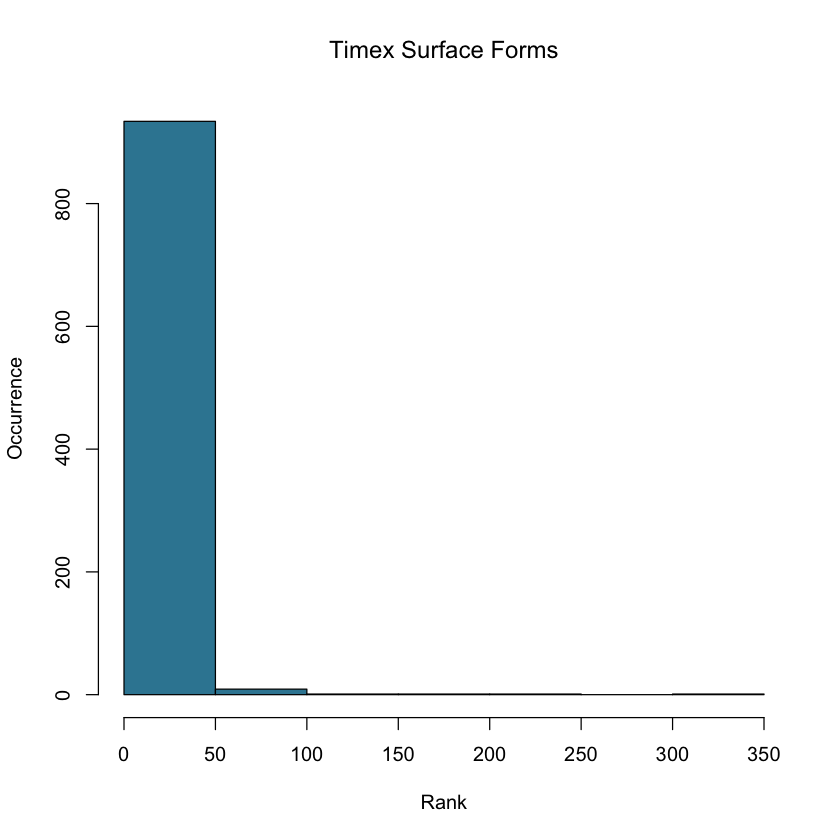

In [5]:
pretty_blue <- '#3686A1' # color is used throughout this nb

hist(tp.surfaces$occurrence,
     main='Timex Surface Forms',
     ylab='Occurrence',
     xlab='Rank',
     col=pretty_blue
    )

The distribution of surface forms almost resembles **Zipf's law** for word frequencies, which is the observation that a word's frequency is inversely proportional to its rank in a corpus (Ibid., 62-63). The graph below illustrates this for time phrase surface form occurrences.

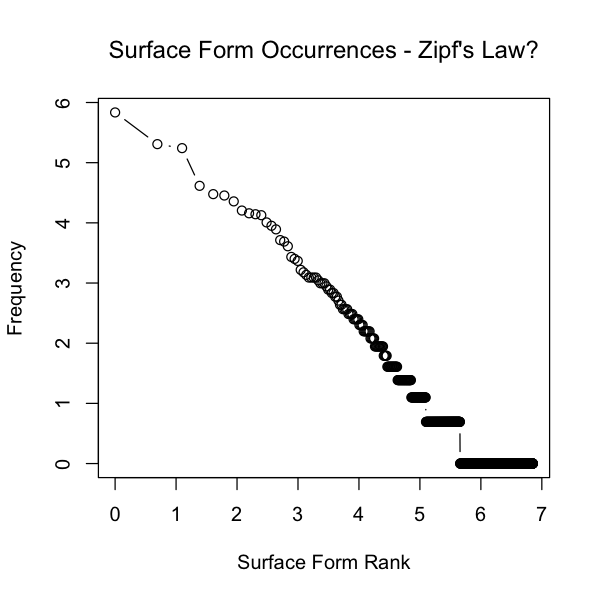

In [6]:
options(repr.plot.width=5, repr.plot.height=5) # adjust plot size

# plot time phrase surface form occurrences
plot(x=log(1:nrow(tp.surfaces)), # apply log transformations
     y=log(sort(tp.surfaces$occurrence, decreasing=T)), # sort
     main="Surface Form Occurrences - Zipf's Law?",
     type='b', # add lines to plot
     ylab='Frequency',
     xlab='Surface Form Rank'
    )

As Zipf's law anticipates, the corpus contains a few (~50) surface forms which are strongly represented. Inversely, a lot of surface forms occur only once. The median occurrence is `1`, backed up by the Interquartile Range (`IQR`):

In [7]:
IQR(tp.surfaces$occurrence)

[1] 1

**Just how much of the sample's surface forms are *hapax legomena*?**

In [8]:
sum(tp.surfaces$occurrence == 1) / length(tp.surfaces$occurrence) # get proportion of hapax

[1] 0.6979937

So 70% (!) of time phrase surface forms occur only once.

### Surface Forms // Lexemes ?

It is insightful that time phrase surface forms are distributed like lexemes in a corpus (Zipf). There is a lot of diversity reflected in the sample. 

### How are time phrases distributed throughout the HB?

To test this question, **we will assemble time phrase counts by chapter** and then apply measures of dispersion on the counts. The `clauses` dataset contains a simple binary value, `1` or `2` for presence/absence of a time phrase, respectively. The dataset represents all clauses in the HB. We use all clauses in order to also count those chapters that do not contain a time phrase at all (these would otherwise be omitted if we used the `timex` dataset).

First the number of clauses in the `clauses` dataset:

In [9]:
nrow(clauses)

[1] 86808

There are 86808 Hebrew clauses in the HB.

Now for the chapter-by-chapter counts of time phrases within clauses.

In [10]:
clauses$book.chapter <- paste(clauses$book, clauses$chapter, sep='.') # create a book.chapter column

tp.chapter <- as.data.frame(table(clauses$book.chapter, clauses$has.timex)) # make the counts

colnames(tp.chapter) <- c('book.chapter', 'has.timex', 'counts') # name cols

# separate True counts for has.timex
# doing it this way ensures chapters with null counts are included
tp.chapter <- tp.chapter[tp.chapter$has.timex == 1,]

cat('\nsample: ')
head(tp.chapter,1 )# show example


cat('\nsummary: ')
summary(tp.chapter$counts) # get summary


sample: 

book.chapter,has.timex,counts
1_Chronicles.1,1,1



summary: 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   4.147   6.000  27.000 

There is fairly wide range between the minimum and maximum timex counts (27). They do not follow a normal distribution, as evidenced by a histogram (Levshina 2015, 50):

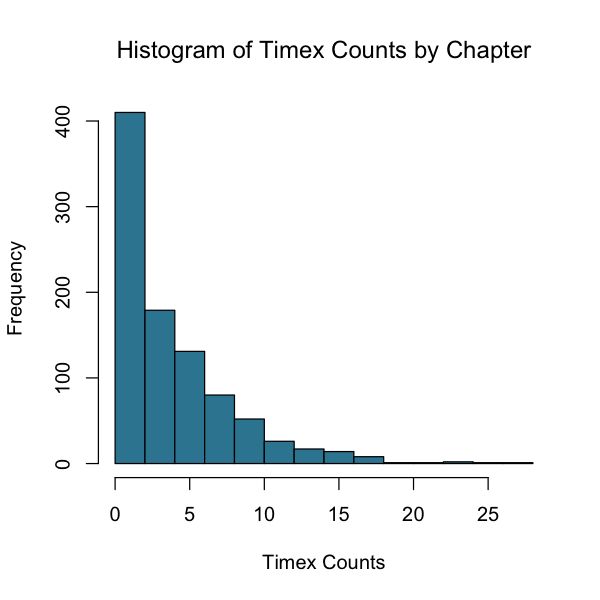

In [11]:
hist(tp.chapter$counts,
     main='Histogram of Timex Counts by Chapter',
     col=pretty_blue,
     xlab='Timex Counts'
    )

We can note that the IQR is relatively low (compared to the maximum value). Combining the counts that fall between the first and third quartiles, **we see that a majority (62%) of the chapters in the HB contain between 1 and 6 time phrases**:

In [12]:
sum(tp.chapter$counts %in% c(1:6)) / length(tp.chapter$counts)

[1] 0.6153846

### How are Timexes Distributed Through Books?

We see that the distribution of time phrases amongst chapters is fairly uneven, but with a modest proportion of the sample (62%) falling within the IQR. 

This raises the question. Could the uneven distribution of timexes reflect a problem of division rather than a problem with the distribution? In other words **are timexes distributed more evenly between books than between chapters?**

In [13]:
book.clauses <- as.data.frame(table(clauses$book)) # count clauses per book

tp.book <- as.data.frame(table(clauses$book, clauses$has.timex)) # count time phrases
colnames(tp.book) <- c('book', 'has.timex', 'counts') # name cols

tp.book <- tp.book[tp.book$has.timex == 1,] # separate True counts for has.timex

# normalize the timex counts
tp.book$counts <- tp.book$counts / book.clauses[,2] # divide by clause counts per book

In [14]:
summary(tp.book$counts) # get summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01096 0.03325 0.04624 0.04681 0.05657 0.11765 

The data exhibits a more normal distribution but with a slight positive skew:

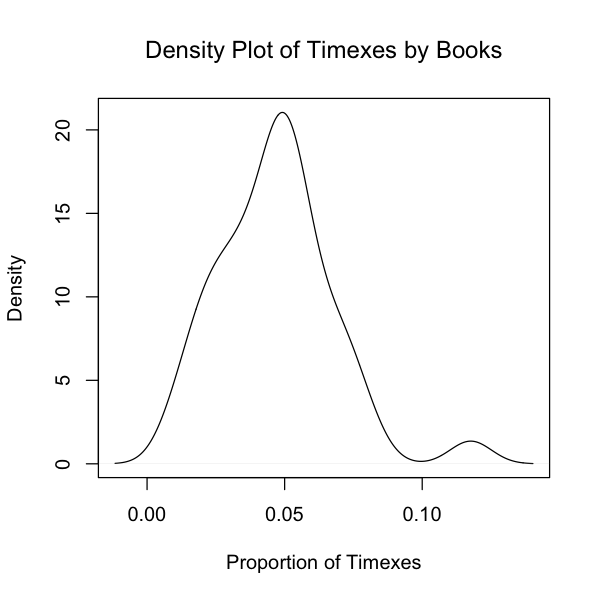

In [15]:
plot(density(tp.book$counts),
     main='Density Plot of Timexes by Books',
     xlab='Proportion of Timexes'
    )

The normal tendency can be seen with the Q-Q plot:

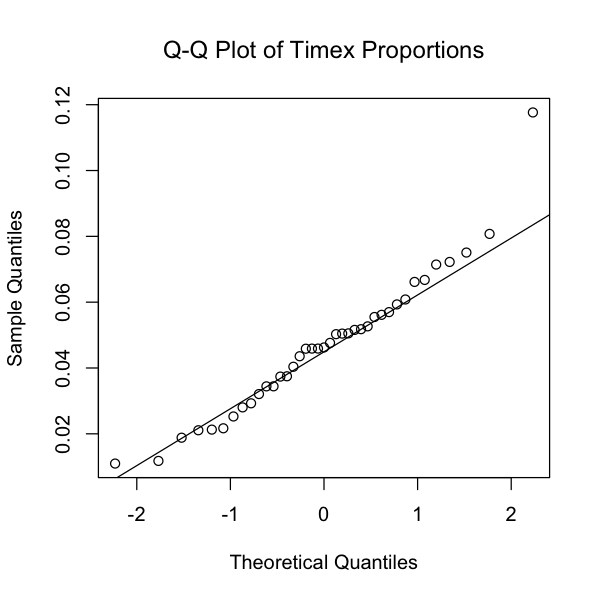

In [16]:
qqnorm(tp.book$counts, 
       main='Q-Q Plot of Timex Proportions'
      )
qqline(tp.book$counts)

**Obadiah, the shortest book of the HB, is the outlier.** It contains a statistically higher proportion of time phrases.

*Interestingly, in the sample below, an outlier from an older version of my dataset alerted me to a problem. The Book of Daniel previously appeared with a high count ~0.11. It was then that I realized I had not excluded Aramaic from the dataset. When the adjustment was subsequently made, Daniel as an outlier disappeared. This demonstrates Levshina's point that outliers can signal problems with data collection (2015, 57).*

In [17]:
tp.book[tp.book$counts > 0.0808,]  # get outlier

,book,has.timex,counts
33,Obadiah,1,0.1176471


We have demonstrated that time phrases are evenly distributed throughout the Hebrew portions of the HB. Most chapters (62%) contain between 1 and 6 timexes. Most books exhibit between 0.01 - 0.06% (1st and 3rd quartiles) of clauses that also contain a time phrase.

## Time Phrase Taxonomy

The issue of categorizing time phrases is crucial for testing the hypothesis of verb form association. It also presents  big challenges. As seen in the surface form investigation, time phrase expressions are nearly as diverse as lexemes.  

The hypothesis that certain timexes associate with certain tenses assumes that there is some kind of interaction between the semantic elements of the timex and the verb tense. Thus, to test the hypothesis, semantic grouping for the timexes is required. 

A working assumption of this study is that time expression conveys tense/aspect in a more transparent way than verb morphology. The meaning of morphological information is not self-evident as it is neither a concrete nor abstract entity; it is a purely grammatical phenomenon. Time phrases, on the other hand, contain clearer clues as to their time or aspect reference, such as adverbs, substantives, or prepositions. 

To what degree is it possible to categorize semantic data reflected in time phrases in a consistent way? Since Hebrew is a dead language and we have no access to native intuition, time phrase classifications should be based as much as possible on formal characteristics. This means examining the patterns expressed within the time phrases and establishing groups based on the presence of various elements.

The problem of circularity is never fully escaped. Modern human intuition has guided the encoding of the phrases as "time phrases"; and modern human intuition guides the selection of discrete features. The hope, then, is that the human element can be somewhat mitigated by the more explicit time/aspect senses communicated by the phrase-internal units.

### Part of Speech Elements

First we examine time phrase groups based on their internal part of speech patterns. 

**The count of discrete pdp patterns is given below**, as stored in the `sp.pattern` column of the dataset.

In [18]:
length(unique(timexes$pdp.pattern))

[1] 270

There are 270 different timex part of speech patterns. **The top 30 will be printed for visual examination.**

In [19]:
tp.pdp <- as.data.frame(table(timexes$pdp.pattern)) # make a count of pdp patterns
colnames(tp.pdp) <- c('pdp.pattern', 'count') # col names
tp.pdp <- tp.pdp[order(tp.pdp$count, decreasing=T),] # order by count

head(tp.pdp, 60)

,pdp.pattern,count
1,advb,584
110,prep-subs,460
58,prep-art-subs-art-prde,413
34,prep-art-subs,294
254,subs-subs,264
23,art-subs,214
171,prep-subs-subs,199
37,prep-art-subs-art-adjv,140
238,subs-art-subs,103
114,prep-subs-art-subs,86


In [20]:
timexes[timexes$pdp.pattern == 'prep-art-subs-advb',]

,book,chapter,verse,clause.n,phrase.n,phrase.trans,preps,num.preps,subs,num.subs,⋯,advbs,num.advbs,pdp.pattern,domain,verb.lex,verb.tense,position.at.vb,position.at.cl,cl.dependency,timex.group
301,Exodus,9,18,434494,672320,K H <T MXR,K,1,<T/,1,⋯,MXR/,1,prep-art-subs-advb,Q,ø,ø,2,3,I,internal.deictic_future.subunit
1365,1_Samuel,9,16,454830,734318,K H <T MXR,K,1,<T/,1,⋯,MXR/,1,prep-art-subs-advb,Q,CLX[,impf,2,1,I,internal.deictic_future.subunit
1854,1_Kings,19,2,463939,761818,K H <T MXR,K,1,<T/,1,⋯,MXR/,1,prep-art-subs-advb,Q,FJM[,impf,2,2,I,internal.deictic_future.subunit
1856,1_Kings,20,6,464088,762220,K H <T MXR,K,1,<T/,1,⋯,MXR/,1,prep-art-subs-advb,Q,CLX[,impf,2,2,I,internal.deictic_future.subunit
1913,2_Kings,7,1,465721,766831,K H <T MXR,K,1,<T/,1,⋯,MXR/,1,prep-art-subs-advb,Q,ø,ø,2,1,I,internal.deictic_future.subunit
1919,2_Kings,7,18,465849,767177,K H <T MXR,K,1,<T/,1,⋯,MXR/,1,prep-art-subs-advb,Q,HJH[,impf,2,5,I,internal.deictic_future.subunit
1937,2_Kings,10,6,466248,768289,K H <T MXR,K,1,<T/,1,⋯,MXR/,1,prep-art-subs-advb,Q,BW>[,impv,2,4,I,internal.deictic_future.subunit


The table shows how important the adverb (`advb`), preposition (`prep`), and substantive (`subs`) are for the phrase-internal structure of the timex. The demonstrative pronoun (``)

**Counts for prepositions, substantives, and adverbs are provided below**, accessed through their own data columns.

The top twenty values are provided. Phrases with multiple elements display those elements separated by a |.

#### Top 20 Prepositions

In [21]:
tp.preps <- as.data.frame(table(timexes[timexes$preps != 'ø',]$preps)) # make a count, exclude null
colnames(tp.preps) <- c('prep', 'count') # col names
tp.preps <- tp.preps[order(tp.preps$count, decreasing=T),] # order by count

head(tp.preps, 20)

,prep,count
10,B,1054
1,<D,304
30,L,286
41,MN,148
8,>XR/,129
19,B|L,83
14,B|B,51
27,K,51
42,MN|<D,33
18,B|B|L,13


**Top 20 Adverbs**

In [22]:
tp.advbs <- as.data.frame(table(timexes[timexes$advbs != 'ø',]$advbs)) # make a count
colnames(tp.advbs) <- c('advb', 'count') # col names
tp.advbs <- tp.advbs[order(tp.advbs$count, decreasing=T),] # order by count

head(tp.advbs, 20)

,advb,count
1,<TH,362
9,>Z,72
27,KN,53
28,LJLH/,40
30,MXR/,39
7,>XR/,34
36,TMJD/,33
24,JWMM,21
12,GM,18
25,JWMM|LJLH/,16


#### Top 20 Substantives

In [23]:
tp.subs <- as.data.frame(table(timexes[timexes$subs != 'ø',]$subs)) # make a count
colnames(tp.subs) <- c('subs', 'count') # col names
tp.subs <- tp.subs[order(tp.subs$count, decreasing=T),] # order by count

head(tp.subs, 20)

,subs,count
99,JWM/,1068
113,KL/,189
22,<WLM/,185
18,<T/,145
76,CNH/,134
43,BQR=/,117
49,CB</,100
14,<RB/,77
120,LJLH/,67
64,CLC/,46


### Method of Classifying Time Phrases

Grouping the time phrases is a big enough task to encompass a major research project. For the present purpose, only limited, hypothetical groupings can be assembled. Two key criteria are used to produce \*N categories of  time phrases:

* preposition and its semantic implication.
* adverb | substantive and its semantic implication

Consequently, these two types can respectively communicate two kinds of semantic data:

* aspectual data through the preposition (e.g. at, for, while, etc.)
* temporal data through the adverb/substantive (e.g. tomorrow, now, etc.)

When combined, the two form a unique classification of a phrase's temporal-aspectual semantic content. Those classifications will be used for the verb form measurements further below.

The classification requires the powerful tools that only Text-Fabric can offer. Thus the categories have been processed in [bhsa_data_generation.ipynb]('../data/bhsa_data_generation.ipynb'). For the semantic classification of the prepositions and adverbs/substantives, a manual method was used on the most attested patterns in consultation with the data tables shown above. Finally, the classifications are added using a template-based search in Text-Fabric (TF Search) to isolate the qualifying phrases.

Using the methods outlined above, **only a select group of \*N time phrases receive a classification.**

### Time Phrase Groups

*[Fill in information about the classes]*

In [27]:
tp.groups <- as.data.frame(table(timexes$timex.group))

tp.groups[order(tp.groups$Freq, decreasing=T),]

,Var1,Freq
56,internal.unit,676
64,ø,464
63,unit,404
33,deictic_present,344
55,internal.subunit,269
21,behind_to.duration,198
29,collection,168
28,behind_to.unit,129
62,subunit,123
27,behind_to.subunit,107


In [53]:
# playing around with the samples

table(droplevels(timexes[timexes$timex.group == 'behind_to.duration',]$phrase.trans))


     <D <D    <D <WLM <D <WLM <D  <D H <WLM     <D NYX       L <D     L <WLM 
         6         52          1          1          1         11        101 
     L NYX  L NYX NYX 
        24          1 

In [50]:
# more play

(timexes[timexes$timex.group == 'behind_to.event',])

,book,chapter,verse,clause.n,phrase.n,phrase.trans,preps,num.preps,subs,num.subs,⋯,advbs,num.advbs,pdp.pattern,domain,verb.lex,verb.tense,position.at.vb,position.at.cl,cl.dependency,timex.group
7,Genesis,3,8,427805,652259,L RWX H JWM,L,1,RWX/,1,⋯,ø,0,prep-subs-art-subs,N,ø,ø,2,3,D,behind_to.event
809,Numbers,35,25,444796,703900,<D MWT H KHN H GDWL,<D,1,MWT/,1,⋯,ø,0,prep-subs-art-subs-art-adjv,Q,JCB[,weqt,2,4,I,behind_to.event
810,Numbers,35,28,444803,703929,<D MWT H KHN H GDWL,<D,1,MWT/,1,⋯,ø,0,prep-subs-art-subs-art-adjv,Q,JCB[,impf,2,4,I,behind_to.event
812,Numbers,35,32,444817,703973,<D MWT H KHN,<D,1,MWT/,1,⋯,ø,0,prep-subs-art-subs,Q,JCB[,infc,2,3,D,behind_to.event
1121,Joshua,20,6,450598,721378,<D MWT H KHN H GDWL,<D,1,MWT/,1,⋯,ø,0,prep-subs-art-subs-art-adjv,Q,ø,ø,2,1,I,behind_to.event
1278,Judges,19,26,453576,730524,<D H >WR,<D,1,>WR/,1,⋯,ø,0,prep-art-subs,N,NPL[,wayq,2,4,I,behind_to.event
1646,2_Samuel,17,22,460045,750198,<D >WR H BQR,<D,1,>WR[,1,⋯,ø,0,prep-subs-art-subs,N,<DR[,perf,2,1,I,behind_to.event
1693,2_Samuel,23,13,460899,752747,>L QYJR,>L,1,QYJR/,1,⋯,ø,0,prep-subs,N,BW>[,wayq,2,3,I,behind_to.event
1794,1_Kings,11,40,462796,758470,<D MWT CLMH,<D,1,MWT/,1,⋯,ø,0,prep-subs-nmpr,N,HJH[,wayq,2,4,I,behind_to.event
1859,1_Kings,20,22,464179,762466,L TCWBH H CNH,L,1,TCWBH/,1,⋯,ø,0,prep-subs-art-subs,Q,ø,ø,2,2,I,behind_to.event
